In [22]:
#This code have a lot new concepts at list we will learning more and I try replicate this code how we learn in the class 
#I have some ideas.
#For the code run need to install the new libs is very simple only type that and will work.
#Maybe that is not the best option for us but we have something work with high accuracy and predictions.

In [1]:
#need to install the libs bellow
#pip install markupsafe==2.0.1
#pip install pycaret
#pip install jinja2

In [1]:
# Import required libraries and dependencies

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.regression import *


In [2]:
# Load the data into a Pandas DataFrame
bt = pd.read_csv(
    "crypto project/Bitcoin Historical Data (2014-2024).csv")

# Display sample data
bt.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,03/24/2024,"67,211.9","64,036.5","67,587.8","63,812.9",65.59K,4.96%
1,03/23/2024,"64,037.8","63,785.6","65,972.4","63,074.9",35.11K,0.40%
2,03/22/2024,"63,785.5","65,501.5","66,633.3","62,328.3",72.43K,-2.62%
3,03/21/2024,"65,503.8","67,860.0","68,161.7","64,616.1",75.26K,-3.46%
4,03/20/2024,"67,854.0","62,046.8","68,029.5","60,850.9",133.53K,9.35%
5,03/19/2024,"62,050.0","67,594.1","68,099.6","61,560.6",148.08K,-8.20%
6,03/18/2024,"67,594.1","68,389.7","68,920.1","66,601.4",78.07K,-1.17%
7,03/17/2024,"68,391.2","65,314.2","68,857.7","64,605.5",66.07K,4.71%
8,03/16/2024,"65,314.2","69,456.5","70,037.0","64,971.0",75.82K,-5.97%
9,03/15/2024,"69,463.7","71,387.1","72,398.1","65,765.6",148.59K,-2.69%


---

In [3]:
# Convert 'Price' and 'Future_Price' columns to numeric
bt['Price'] = bt['Price'].str.replace(',', '')
bt['Price'] = bt['Price'].astype(float)
# Check the data types after conversion
print(bt.dtypes)


Date         object
Price       float64
Open         object
High         object
Low          object
Vol.         object
Change %     object
dtype: object


In [4]:
bt

,Date,Price,Open,High,Low,Vol.,Change %
0,03/24/2024,67211.9,"64,036.5","67,587.8","63,812.9",65.59K,4.96%
1,03/23/2024,64037.8,"63,785.6","65,972.4","63,074.9",35.11K,0.40%
2,03/22/2024,63785.5,"65,501.5","66,633.3","62,328.3",72.43K,-2.62%
3,03/21/2024,65503.8,"67,860.0","68,161.7","64,616.1",75.26K,-3.46%
4,03/20/2024,67854.0,"62,046.8","68,029.5","60,850.9",133.53K,9.35%
...,...,...,...,...,...,...,...
3649,03/28/2014,482.6,460.5,515.0,453.8,4.11K,4.81%
3650,03/27/2014,460.5,562.5,567.8,460.5,3.78K,-18.13%
3651,03/26/2014,562.5,562.9,575.4,546.3,3.71K,-0.08%
3652,03/25/2014,562.9,567.6,569.7,550.4,3.87K,-0.82%


In [11]:
#A variable for prediction 1 day out into the future

future_days= 1

#Create a new column (the target or dependent variable) shifted 'n' units up, in this case n=1

bt["Future_Price"] = bt[["Price"]].shift(-future_days)

#Choose columns to keep

bt= bt[["Price", "Future_Price"]]

#Show the data

bt

#The row number 3654 have the NaN value int Future_Price column because will be the value getting in the next day

,Price,Future_Price
0,67211.9,64037.8
1,64037.8,63785.5
2,63785.5,65503.8
3,65503.8,67854.0
4,67854.0,62050.0
...,...,...
3649,482.6,460.5
3650,460.5,562.5
3651,562.5,562.9
3652,562.9,567.6


In [12]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         3654 non-null   float64
 1   Future_Price  3653 non-null   float64
dtypes: float64(2)
memory usage: 57.2 KB


In [13]:
#Copy the data set
btc_prices= bt.copy()

#Create the independent data set
X = np.array(btc_prices[btc_prices.columns])

#Remove the last 'n' rows from the data set where 'n' is the future_days=1

X= X[:len(bt)-future_days]

#Create the dependent data set (y) and convert the dataframe to a numpy array

y= np.array(btc_prices['Future_Price'])

#Get all pf the y values except for the last 'n' rows future_days

y=y[:-future_days]

#Split the data intoa 85% training data set and a 15% testing data set

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.15, random_state= 0, shuffle=False)



In [14]:
#Get the train data and transform it to a dataframe
train_data= pd.DataFrame(X_train, columns= btc_prices.columns)

#Show the first 7 rows of the data

train_data.head(7)

,Price,Future_Price
0,67211.9,64037.8
1,64037.8,63785.5
2,63785.5,65503.8
3,65503.8,67854.0
4,67854.0,62050.0
5,62050.0,67594.1
6,67594.1,68391.2


In [15]:
#Get the test data and transform it to a dataframe

test_data = pd.DataFrame(X_test, columns=btc_prices.columns)

#Show the first 7 rows of data
test_data.head(7)

,Price,Future_Price
0,229.9,230.0
1,230.0,226.3
2,226.3,231.1
3,231.1,231.1
4,231.1,232.2
5,232.2,232.7
6,232.7,228.6


In [16]:
#Initialize the setup
regression_setup= setup(data=train_data, target= 'Future_Price', session_id= 123, use_gpu= True)

#setup() function: This function is likely provided by a specific library or framework for machine learning.
#It's used to set up the data and configuration for the analysis.
#session_id=123: This parameter sets a random seed (123 in this case) to ensure reproducibility of the results.
#use_gpu=True: This parameter indicates whether to use GPU (Graphics Processing Unit) for computations if available.

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

,Description,Value
0,Session id,123
1,Target,Future_Price
2,Target type,Regression
3,Original data shape,"(3105, 2)"
4,Transformed data shape,"(3105, 2)"
5,Transformed train set shape,"(2173, 2)"
6,Transformed test set shape,"(932, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

In [17]:
#Train on all of the models and sort it by the R-squared metric aka(r2) and then store the model with the best r2 score
best_model= compare_models(sort= 'r2')

#This code 'compare_models' will test all possibilities and give the best result based on the 'sort' argument in this case using 'r2' which show the accuracy.
# In the yellow is the best results, we are looking for the best accuracy that's why we sort by r2 and will use the Linear Regression model.

#Model: This column indicates the type of regression model used, in this case, Linear Regression.

#MAE (Mean Absolute Error): It measures the average absolute difference between the predicted values and the actual values.
#It gives an idea of how close the predictions are to the actual values on average.

#MSE (Mean Squared Error): It calculates the average of the squares of the errors between predicted and actual values. 

#RMSE (Root Mean Squared Error): It's the square root of the MSE. RMSE is often interpreted in the same units as the target variable, 
#making it more interpretable than MSE.

#R^2 (R-squared) (accuracy): It represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
#It ranges from 0 to 1, where 1 indicates a perfect fit.

#RMSLE (Root Mean Squared Logarithmic Error): It's a variation of RMSE that applies a logarithmic transformation to both the predicted and actual
#values before calculating the error.

#MAPE (Mean Absolute Percentage Error): It measures the average absolute percentage difference between the predicted and actual values,

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,442.4122,785381.8562,876.6980,0.9974,0.0386,0.0275,0.0070
lasso,Lasso Regression,442.4124,785381.7781,876.6979,0.9974,0.0386,0.0275,0.0070
br,Bayesian Ridge,442.4162,785381.6469,876.6978,0.9974,0.0386,0.0275,0.0060
omp,Orthogonal Matching Pursuit,442.4124,785381.7844,876.6980,0.9974,0.0386,0.0275,0.0070
huber,Huber Regressor,440.6881,784339.4575,876.1823,0.9974,0.0368,0.0251,0.0080
lar,Least Angle Regression,442.4125,785381.6906,876.6979,0.9974,0.0386,0.0275,0.0070
en,Elastic Net,442.4124,785381.7781,876.6979,0.9974,0.0386,0.0275,0.0070
ridge,Ridge Regression,442.4124,785381.7844,876.6980,0.9974,0.0386,0.0275,0.0070
llar,Lasso Least Angle Regression,442.4125,785381.6906,876.6979,0.9974,0.0386,0.0275,0.0070
lightgbm,Light Gradient Boosting Machine,482.4197,888457.5158,934.4487,0.9970,0.0431,0.0296,0.6980


In [18]:
#Create the model and show it's prediction metrics on the training data set
model= create_model(best_model)

#The yellow columns match the results on the first row above

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,407.4873,626323.3125,791.4059,0.9976,0.0398,0.0291
1,466.1626,751613.3125,866.9564,0.9976,0.0383,0.0276
2,470.5314,951284.3750,975.3381,0.9965,0.0394,0.0268
3,607.1011,1322171.2500,1149.8571,0.9961,0.0420,0.0303
4,422.1468,668805.4375,817.8052,0.9977,0.0390,0.0263
5,347.8048,429421.0625,655.3022,0.9983,0.0365,0.0261
6,460.7869,875705.0000,935.7911,0.9970,0.0401,0.0285
7,437.0611,933553.3125,966.2056,0.9973,0.0433,0.0310
8,402.9809,602017.5000,775.8979,0.9981,0.0379,0.0283


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

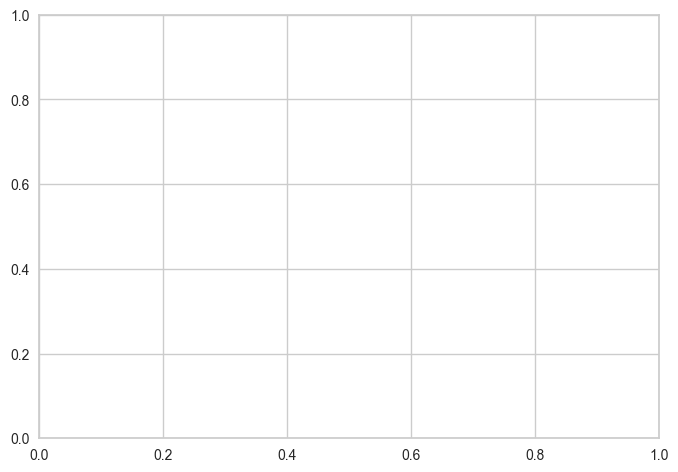

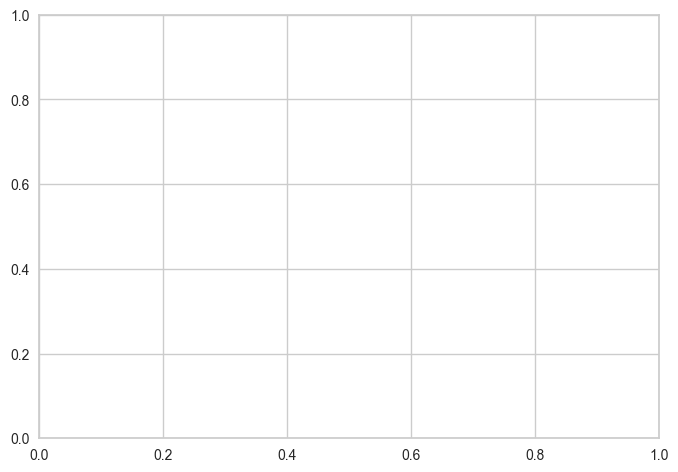

In [19]:
#Evaluate the model
evaluate_model(model)

#Here we are evaluating the model and whne you click in the options will show the charts of the analyse of the model "Residuals",
#"Prediction Error", "Cooks Distance", "Learning Curve for LinearRegression"

#Havee some options is not showing I don't know why.

In [20]:
#Get the predictions
unseen_predictions= predict_model(model, data=train_data)

#Show the predictions
unseen_predictions

#Here we are predicting the next day in the 'prediction_label', we have the day price on the 'Price column',
#'Future_price' is showing the real price for the next day

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,437.6346,766933.9375,875.7476,0.9974,0.0395,0.0274


,Price,Future_Price,prediction_label
0,67211.898438,64037.800781,67115.234375
1,64037.800781,63785.500000,63946.304688
2,63785.500000,65503.800781,63694.414062
3,65503.800781,67854.000000,65409.914062
4,67854.000000,62050.000000,67756.289062
...,...,...,...
3100,238.899994,232.500000,251.208542
3101,232.500000,234.300003,244.818970
3102,234.300003,235.000000,246.616043
3103,235.000000,233.800003,247.314896


---